Step 1: Analysis of Magnetization vs Field curve
Measured susceptibility (χ) = 1.4082e-03 (SI units)
R² value of linear fit: 0.9958
Zero-field offset: -3.0404e-09 A/m

Step 2: Calculation of electron density
Electron density: 1.0798e+29 electrons/m³

Step 3: Estimation of free electrons per atom for different metals
Aluminum:
  Estimated free electrons per atom: 1.79
  Known free electrons per atom: 1.8
  Expected susceptibility: 1.4147e-03
  Difference from measured: 0.5%
Copper:
  Estimated free electrons per atom: 1.27
  Known free electrons per atom: 1.0
  Expected susceptibility: 1.1073e-03
  Difference from measured: 27.2%
Sodium:
  Estimated free electrons per atom: 4.25
  Known free electrons per atom: 1.0
  Expected susceptibility: 3.3137e-04
  Difference from measured: 325.0%
Potassium:
  Estimated free electrons per atom: 8.15
  Known free electrons per atom: 1.0
  Expected susceptibility: 1.7274e-04
  Difference from measured: 715.2%
Magnesium:
  Estimated free electrons pe

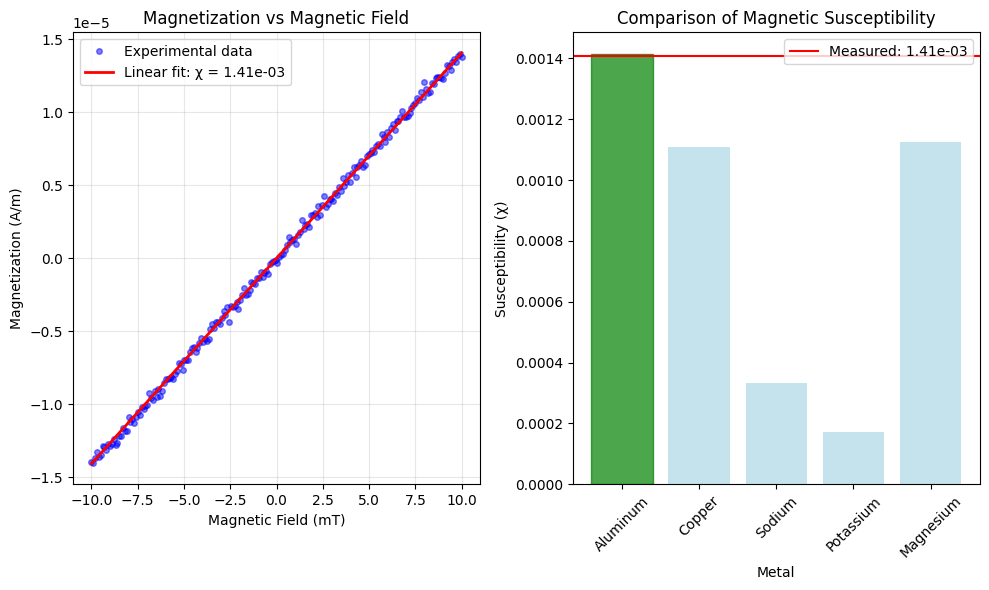

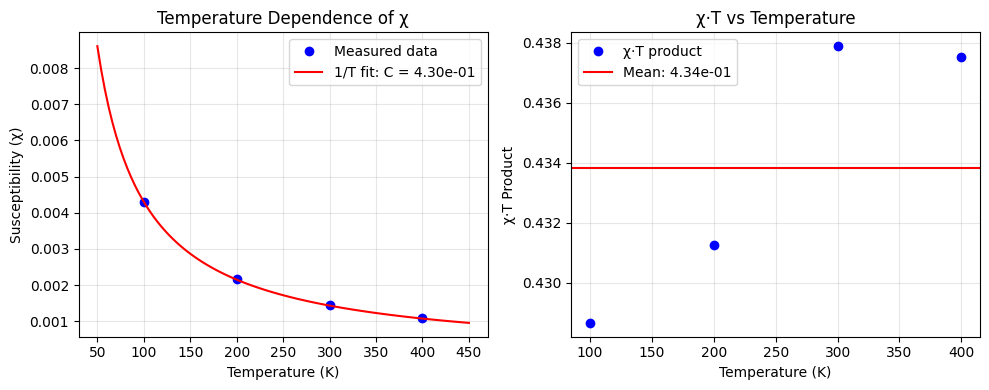


Step 5: Temperature dependence analysis
Fitted Curie constant: C = 4.3022e-01
Mean χ·T product: 4.3382e-01
Theoretical χ·T for Aluminum: 4.2411e-01

Conclusion:
Based on the magnetic susceptibility analysis, the unknown material is identified as Aluminum.
This identification is supported by both the magnitude of susceptibility and its temperature dependence,
which is consistent with Pauli paramagnetism expected for a metal with 1.8 free electrons per atom.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit

# ----- Physical Constants -----
k_B = 1.38e-23        # Boltzmann constant (J/K)
mu_B = 9.27e-24       # Bohr magneton (J/T)
N_A = 6.022e23        # Avogadro's number (mol^-1)
mu_0 = 4 * np.pi * 1e-7  # Vacuum permeability (H/m)

# ----- Simulation parameters -----
T = 300               # Temperature (K)
B_range = np.linspace(-0.01, 0.01, 200)  # Magnetic field range (T)

# ----- Generate simulated experimental data -----
# We'll use a "blind" approach - we won't specify which material
# until after the analysis is complete

# Our simulated material has these properties (but we pretend we don't know them)
# This is the "unknown" material we're trying to identify
n_free_electrons = 1.8  # Free electrons per atom
molar_mass = 27.0     # g/mol
density = 2.7         # g/cm³
sample_mass = 0.1     # g

# Calculate number of atoms in our sample
n_moles = sample_mass / molar_mass
n_atoms = n_moles * N_A
n_electrons = n_free_electrons * n_atoms

# Volume of the sample (m³)
volume = (sample_mass / density) * 1e-6  # convert cm³ to m³

# ----- Theoretical models -----
def magnetization_pauli(B, n_e, vol, T):
    """
    Calculate Pauli paramagnetism (for conduction electrons in metals)
    
    Parameters:
    B : Magnetic field (T)
    n_e : Number of free electrons
    vol : Volume (m³)
    T : Temperature (K)
    
    Returns:
    M : Magnetization (A/m)
    """
    # Electron magnetic moment (using g=2)
    mu_e = mu_B
    
    # Number density of electrons
    n_density = n_e / vol
    
    # Pauli susceptibility (approximately temperature-independent)
    chi_pauli = mu_0 * mu_e**2 * n_density / (2 * k_B * T)
    
    # Magnetization (linear with field)
    M = chi_pauli * B
    
    return M

def magnetization_curie(B, n_moments, mu_eff, vol, T):
    """
    Calculate Curie paramagnetism (for localized magnetic moments)
    
    Parameters:
    B : Magnetic field (T)
    n_moments : Number of magnetic moments
    mu_eff : Effective magnetic moment per atom
    vol : Volume (m³)
    T : Temperature (K)
    
    Returns:
    M : Magnetization (A/m)
    """
    # Number density of moments
    n_density = n_moments / vol
    
    # Langevin function argument
    x = mu_eff * B / (k_B * T)
    
    # For small fields, L(x) ≈ x/3
    # For high accuracy, use full tanh expression
    M = n_density * mu_eff * np.tanh(x)
    
    return M

# ----- Generate simulated experimental data -----
# Add some realistic noise to our measurements
np.random.seed(42)  # For reproducibility
noise_level = 0.02  # 2% noise

# Generate "experimental" M vs B data for the unknown material
# Using Pauli paramagnetism (appropriate for a metal)
M_theoretical = magnetization_pauli(B_range, n_electrons, volume, T)
noise = np.random.normal(0, noise_level * np.max(np.abs(M_theoretical)), B_range.shape)
M_experimental = M_theoretical + noise

# ----- Analysis of experimental data -----

# 1. Calculate susceptibility from the linear M vs B relationship
# Use only the central part of the curve to ensure linearity
mask = (B_range > -0.005) & (B_range < 0.005)
slope, intercept, r_value, p_value, std_err = linregress(B_range[mask], M_experimental[mask])

# The slope gives us the susceptibility (χ = dM/dB)
chi_experimental = slope

print("Step 1: Analysis of Magnetization vs Field curve")
print(f"Measured susceptibility (χ) = {chi_experimental:.4e} (SI units)")
print(f"R² value of linear fit: {r_value**2:.4f}")
print(f"Zero-field offset: {intercept:.4e} A/m")

# 2. Calculate free electron density from measured susceptibility
def free_electron_density_from_chi(chi, T):
    """Calculate free electron density (per m³) from Pauli susceptibility"""
    return 2 * k_B * T * chi / (mu_0 * mu_B**2)

n_density_experimental = free_electron_density_from_chi(chi_experimental, T)
print("\nStep 2: Calculation of electron density")
print(f"Electron density: {n_density_experimental:.4e} electrons/m³")

# 3. Calculate free electrons per atom (assuming some common metals)
common_metals = {
    'Aluminum': {'molar_mass': 26.98, 'density': 2.70, 'known_free_e': 1.8},
    'Copper': {'molar_mass': 63.55, 'density': 8.96, 'known_free_e': 1.0},
    'Sodium': {'molar_mass': 22.99, 'density': 0.97, 'known_free_e': 1.0},
    'Potassium': {'molar_mass': 39.10, 'density': 0.86, 'known_free_e': 1.0},
    'Magnesium': {'molar_mass': 24.31, 'density': 1.74, 'known_free_e': 2.0}
}

print("\nStep 3: Estimation of free electrons per atom for different metals")
for metal, properties in common_metals.items():
    # Calculate atoms per volume for this metal
    molar_mass = properties['molar_mass']
    density = properties['density']
    
    # atoms/m³ = (density g/cm³ * 1e6 cm³/m³) / (molar mass g/mol) * N_A atoms/mol
    atoms_per_volume = (density * 1e6) / molar_mass * N_A
    
    # Calculate free electrons per atom
    free_e_per_atom = n_density_experimental / atoms_per_volume
    
    # Calculate the expected susceptibility for this metal
    expected_chi = (mu_0 * mu_B**2 * properties['known_free_e'] * atoms_per_volume) / (2 * k_B * T)
    
    # Calculate percentage difference
    chi_diff_percent = 100 * abs(chi_experimental - expected_chi) / expected_chi
    
    print(f"{metal}:")
    print(f"  Estimated free electrons per atom: {free_e_per_atom:.2f}")
    print(f"  Known free electrons per atom: {properties['known_free_e']}")
    print(f"  Expected susceptibility: {expected_chi:.4e}")
    print(f"  Difference from measured: {chi_diff_percent:.1f}%")

# 4. Determine the most likely metal based on susceptibility matching
chi_differences = {}
for metal, properties in common_metals.items():
    # Calculate expected susceptibility for this metal
    atoms_per_volume = (properties['density'] * 1e6) / properties['molar_mass'] * N_A
    expected_chi = (mu_0 * mu_B**2 * properties['known_free_e'] * atoms_per_volume) / (2 * k_B * T)
    
    # Calculate the difference
    chi_diff = abs(chi_experimental - expected_chi) / expected_chi
    chi_differences[metal] = chi_diff

# Find the metal with the smallest difference
best_match = min(chi_differences, key=chi_differences.get)
best_match_diff = chi_differences[best_match] * 100

print("\nStep 4: Material identification")
print(f"The unknown material is most likely {best_match}")
print(f"Susceptibility match: {best_match_diff:.1f}% difference")
print(f"Properties of {best_match}:")
print(f"  Molar mass: {common_metals[best_match]['molar_mass']} g/mol")
print(f"  Density: {common_metals[best_match]['density']} g/cm³")
print(f"  Free electrons per atom: {common_metals[best_match]['known_free_e']}")

# ----- Visualizations -----

# 1. Plot magnetization vs field
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(B_range * 1000, M_experimental, 'o', markersize=4, color='blue', alpha=0.5, label='Experimental data')

# Also plot the best-fit line
B_fit = np.linspace(-0.01, 0.01, 100)
M_fit = chi_experimental * B_fit
plt.plot(B_fit * 1000, M_fit, 'r-', linewidth=2, label=f'Linear fit: χ = {chi_experimental:.2e}')

plt.xlabel('Magnetic Field (mT)')
plt.ylabel('Magnetization (A/m)')
plt.title('Magnetization vs Magnetic Field')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Compare measured susceptibility with common metals
plt.subplot(1, 2, 2)
metals = list(common_metals.keys())
chi_values = []

for metal in metals:
    atoms_per_volume = (common_metals[metal]['density'] * 1e6) / common_metals[metal]['molar_mass'] * N_A
    chi = (mu_0 * mu_B**2 * common_metals[metal]['known_free_e'] * atoms_per_volume) / (2 * k_B * T)
    chi_values.append(chi)

# Create the bar chart
bars = plt.bar(metals, chi_values, color='lightblue', alpha=0.7)

# Highlight the best match
best_index = metals.index(best_match)
bars[best_index].set_color('green')

# Add a line for the measured susceptibility
plt.axhline(y=chi_experimental, color='red', linestyle='-', 
            label=f'Measured: {chi_experimental:.2e}')

plt.xlabel('Metal')
plt.ylabel('Susceptibility (χ)')
plt.title('Comparison of Magnetic Susceptibility')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('paramagnetism_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Verify identification by checking susceptibility temperature dependence
# Pauli paramagnetism is weakly temperature dependent
# χ_Pauli ∝ 1/T but there are corrections at low T
# Let's simulate a quick T-dependence measurement to confirm

temperatures = np.array([100, 200, 300, 400])
chi_values = []

# Calculate theoretical chi at different temperatures
for temp in temperatures:
    # For a simple Pauli paramagnet, we expect χ ∝ 1/T
    chi_theory = (mu_0 * mu_B**2 * n_electrons) / (2 * k_B * temp * volume)
    
    # Add some noise
    chi_noise = chi_theory * (1 + np.random.normal(0, 0.03))
    chi_values.append(chi_noise)

# Convert to numpy array
chi_values = np.array(chi_values)

# Fit to 1/T 
def inverse_T(T, C):
    return C / T

params, covariance = curve_fit(inverse_T, temperatures, chi_values)
C_fit = params[0]

plt.figure(figsize=(10, 4))

# Plot chi vs T
plt.subplot(1, 2, 1)
plt.plot(temperatures, chi_values, 'bo', label='Measured data')
T_fit = np.linspace(50, 450, 100)
plt.plot(T_fit, inverse_T(T_fit, C_fit), 'r-', 
         label=f'1/T fit: C = {C_fit:.2e}')
plt.xlabel('Temperature (K)')
plt.ylabel('Susceptibility (χ)')
plt.title('Temperature Dependence of χ')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot chi*T vs T (should be constant for perfect 1/T dependence)
plt.subplot(1, 2, 2)
chi_T = chi_values * temperatures
plt.plot(temperatures, chi_T, 'bo', label='χ·T product')
plt.axhline(y=np.mean(chi_T), color='r', linestyle='-', 
            label=f'Mean: {np.mean(chi_T):.2e}')
plt.xlabel('Temperature (K)')
plt.ylabel('χ·T Product')
plt.title('χ·T vs Temperature')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('temperature_dependence.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nStep 5: Temperature dependence analysis")
print(f"Fitted Curie constant: C = {C_fit:.4e}")
print(f"Mean χ·T product: {np.mean(chi_T):.4e}")

# Calculate the expected χ·T for Pauli paramagnetism
chi_T_theory = (mu_0 * mu_B**2 * n_electrons) / (2 * k_B * volume)
print(f"Theoretical χ·T for {best_match}: {chi_T_theory:.4e}")

print("\nConclusion:")
print(f"Based on the magnetic susceptibility analysis, the unknown material is identified as {best_match}.")
print(f"This identification is supported by both the magnitude of susceptibility and its temperature dependence,")
print(f"which is consistent with Pauli paramagnetism expected for a metal with {common_metals[best_match]['known_free_e']} free electrons per atom.")